In [1]:
import pickle
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import optimizers
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
from keras import regularizers


Using TensorFlow backend.


In [2]:
%matplotlib inline

In [3]:
infile = open('line-data-input/X1.pickle','rb')
x_data = pickle.load(infile)
infile.close()

infile = open('line-data-input/Y1.pickle','rb')
y_data = pickle.load(infile)
infile.close()

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [5]:
image_index = 7777
y_test[image_index]

91

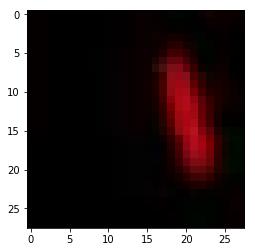

In [6]:
plt.imshow(x_data[image_index], cmap='Greys')

In [7]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 3)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 3)
x_test.shape

(19200, 28, 28, 3)

In [8]:
input_shape = (28, 28, 3)

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB values
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (76800, 28, 28, 3)
Number of images in x_train 76800
Number of images in x_test 19200


In [10]:
# Creating a Sequential Model and adding the layers
model = Sequential()

model.add(Conv2D(64, kernel_size=(5,5), strides=(1,1), activation=tf.nn.relu , input_shape=input_shape, padding='same'))
model.add(Conv2D(8, kernel_size=(1,1), strides=(1,1), activation=tf.nn.relu , input_shape=input_shape, padding='same'))
model.add(Conv2D(32, kernel_size=(1,1), strides=(1,1), activation=tf.nn.relu , input_shape=input_shape, padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), activation=tf.nn.relu , input_shape=input_shape, padding='same'))
model.add(Conv2D(8, kernel_size=(1,1), strides=(1,1), activation=tf.nn.relu , input_shape=input_shape, padding='same'))
model.add(Conv2D(32, kernel_size=(1,1), strides=(1,1), activation=tf.nn.relu , input_shape=input_shape, padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=(2,2), strides=(1,1), activation=tf.nn.relu , input_shape=input_shape, padding='same'))
model.add(Conv2D(8, kernel_size=(1,1), strides=(1,1), activation=tf.nn.relu , input_shape=input_shape, padding='same'))
model.add(Conv2D(32, kernel_size=(1,1), strides=(1,1), activation=tf.nn.relu , input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
# model.add(Dropout(0.2))
# 
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(97,activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
# model summary
summary = model.summary()
print(summary)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        4864      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 8)         520       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        288       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
__________

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.25, epochs=10, batch_size=16, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 57600 samples, validate on 19200 samples
Epoch 1/10
57600/57600 [==============================] - 450s 8ms/step - loss: 1.5736 - acc: 0.4915 - val_loss: 0.4085 - val_acc: 0.8395
Epoch 2/10
57600/57600 [==============================] - 446s 8ms/step - loss: 0.5351 - acc: 0.7939 - val_loss: 0.2718 - val_acc: 0.8923
Epoch 3/10
57600/57600 [==============================] - 478s 8ms/step - loss: 0.3471 - acc: 0.8696 - val_loss: 2.6849 - val_acc: 0.6267
Epoch 4/10
57600/57600 [==============================] - 448s 8ms/step - loss: 0.2624 - acc: 0.9019 - val_loss: 0.7192 - val_acc: 0.8210
Epoch 5/10
57600/57600 [==============================] - 430s 7ms/step - loss: 0.2151 - acc: 0.9210 - val_loss: 0.0726 - val_acc: 0.9718
Epoch 6/10
57600/57600 [==============================] - 440s 8ms/step - loss: 0.1805 - acc: 0.9340 - val_loss: 0.0673 - val_acc: 0.9743
Epoch 7/10
57600/57600 [==============================] - 430s 7ms/step - 

In [13]:
model.evaluate(x_test, y_test)

19200/19200 [==============================] - 28s 1ms/step


[0.024745319107945155, 0.9925]

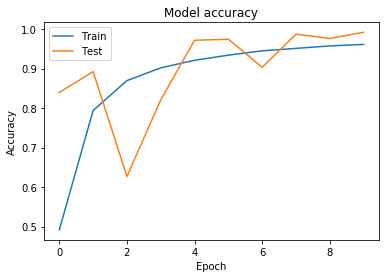

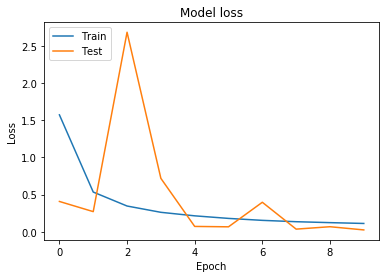

In [18]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# plt.savefig('figures/part2/line_model_part2-training-validation-accurracy.png')

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# plt.savefig('figures/part2/line_model_part2-training-validation-loss.png')

In [19]:
# save model
model.save('models/line_model_part2.h5')  # creates a HDF5 file